In [1]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /Users/julianward/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages (1.1.2)


In [2]:
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression

# Train Test Splits

### The Problem

When building a predictive model we can run into a problem of overfitting. 

**OVERFITTING WILL BE A MAJOR TOPIC WE WILL DEAL WITH FOR AS LONG AS WE MAKE PREDICTIVE MODELS**

Overfitting is a model that does *too well* on the data we've given in, so much so that it makes the model *worse* at looking at new data.

Take this data for example:

![Clearly linear scatterplot](./justdot.png)

It's our data is pretty clearly linear, a linear model wouldn't prefectly predict every point, but it would be pretty good.

![Simple linear model](./propermodel.png)

Buuuuuuuut I could totally write an algorithm or funtion that perfectly hits every point here.

!['Better' model](./overfitmodel.png)


This second model will perform better on any metrics we feed into it... FOR THESE SPECIFIC DATA POINTS. 

But, we want models that make predictions. That's 99% of the point of data science. 

If we tried to feed our models new information (e.g. use the model in the real world) the 'worse' model will perform much better.

![New data comparison](./withnewdata.png)



So how do we know if our model is overfit? We can't magically create new data, but we can HIDE data from the model, only to reveal it later. This is the train-test split. We train the models on one set of data, we verify the model's performance on the test data. 



#### Getting an example dataset

Let's grab a dataset and see how this works. I'm just grabbing the diabetes dataset from sklearn.

In [3]:
#first we load the dataset. load_diabetes has an option to load directly as a pandas df

diabetes_df = datasets.load_diabetes(as_frame=True, scaled = False).frame
# choosing 'as_frame = True' makes the dataset a pandas DF, setting scaled = False
# means that we get the raw data, and I'll talk about why I did that later.
# NOTE! That's not an option in the version of sklearn y'all have.

diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


Now the FIRST thing we want to do is the train-test-split. 

In [4]:
# This is the part of the lecture where I verbally explain all the options for train_test_split
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

### The options to input into train_test_split:

##### arrays
First, we MUST pass in arrays. They must be "sequence of indexables with same length / shape" That is, the same number of rows, and those rows must match up. So row 1 in one array needs to map to row 1 in the second array.  In this case, our X variables or predictors, and our Y variables or target. 

##### test_size
Next, we can choose the test_size. We can set this manually, or use the default. The default is .25, or 25% of the data. If we pass an int it will set the size of the test size to that int, if we pass a value between 1 and 0 it makes the test dataset a corresponding % of the overall dataset. The default here is fine for most use cases.

##### train_size
Or we can set the training size instead of the test size. But usually we want to use all the data we don't put into the test set, so by default we leave this untouched.

##### random_state
So, we want our tts to be randomized, otherwise we'll bias the samples and blahblahblah. Buuuuut we want to be able to open and close the notebook and have our results be repeatable. So here we usually want to pass in some arbitary random seed, so that each time the TTS is run *on the same dataset* you end up with the same random result. best practice is to pick a number and stick with it. Because programmers are nerds, 42 is a fairly widely used arbitrary seed. I do 14 because that's my lucky number. You can do whatever, it just forces the split to be the same each time you run it.

##### shuffle 
Shuffle is a boolean option that defaults to true. Basically it makes sure that you're actually grabbing data points randomly, which we almost always want to do. 

##### stratify
You can pass in an array to have the split try to ensure that it balances the split based on the contents of that array. Usually we don't do this, and if we do, usually we stratify by the target. 

For an example of when we might use this, if we have a classification dataset that has some very rare values in the target, we might want to force the t-t-s to try to make sure there's an equal proportion of each possible target in the train and the test. This is a problem that goes away with bigger datasets thanks to the Law of Large Numbers.

### Our train_test_split

##### arrays

Our arrays will be the predictors on one hand and the target on the other. In this case, we'll use diabetes_df.drop('target', axis = 0) and diabetes_df.target

##### test_size

We can leave this as default.

##### train_size

We can leave this as default.

##### random_state

I'm going to set this at 14 just because I can.

##### shuffle

We can leave this as default.

##### stratify

We can leave this as default.


In [5]:
train_test_split(diabetes_df.drop('target', axis = 1), diabetes_df.target, random_state = 42)

# This output is strange. train_test_split returns four arrays, so we need to set it to four different variables.

[      age  sex   bmi     bp     s1     s2    s3    s4      s5     s6
 16   47.0  1.0  30.3  109.0  207.0  100.2  70.0  3.00  5.2149   98.0
 408  66.0  1.0  21.7  126.0  212.0  127.8  45.0  4.71  5.2781  101.0
 432  51.0  1.0  31.5   93.0  231.0  144.0  49.0  4.70  5.2523  117.0
 316  53.0  2.0  27.7   95.0  190.0  101.8  41.0  5.00  5.4638  101.0
 3    24.0  1.0  25.3   84.0  198.0  131.4  40.0  5.00  4.8903   89.0
 ..    ...  ...   ...    ...    ...    ...   ...   ...     ...    ...
 106  22.0  1.0  19.3   82.0  156.0   93.2  52.0  3.00  3.9890   71.0
 270  50.0  2.0  29.2  119.0  162.0   85.2  54.0  3.00  4.7362   95.0
 348  57.0  1.0  24.5   93.0  186.0   96.6  71.0  3.00  4.5218   91.0
 435  45.0  1.0  24.2   83.0  177.0  118.4  45.0  4.00  4.2195   82.0
 102  23.0  1.0  29.0   90.0  216.0  131.4  65.0  3.00  4.5850   91.0
 
 [331 rows x 10 columns],
       age  sex   bmi      bp     s1     s2    s3    s4      s5     s6
 287  61.0  1.0  25.8   90.00  280.0  195.4  55.0  5.00  4.99

In [6]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_df.drop('target', axis = 1), diabetes_df.target, random_state = 42)



In [7]:
type(X_train.index[0])

numpy.int64

In [8]:
X_test.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
287,61.0,1.0,25.8,90.00,280.0,195.4,55.0,5.0,4.9972,90.0
211,74.0,1.0,29.8,101.00,171.0,104.8,50.0,3.0,4.3944,86.0
72,66.0,2.0,26.0,91.00,264.0,146.6,65.0,4.0,5.5683,87.0
321,75.0,1.0,31.2,117.67,229.0,138.8,29.0,7.9,5.7236,106.0
73,52.0,2.0,24.5,94.00,217.0,149.4,48.0,5.0,4.5850,89.0


In [9]:
y_train.head()

16     166.0
408    189.0
432    173.0
316    220.0
3      206.0
Name: target, dtype: float64

In [10]:
y_test.head()

287    219.0
211     70.0
72     202.0
321    230.0
73     111.0
Name: target, dtype: float64

Note the way the indices line up. This is why indices are important!

Note also how the indices have been randomized. 

Since our target was just a single column, y_train and y_test came out as a series while X_train and X_test came out as full dataframes.

#### Data leaking

This leads to problems of data leakage, or, the possibility of, unless we're careful, information from the test set 'leaking' its way into our training data. This can happen a lot of ways, and we need to keep an eye out for it. 

For instance, check out [this paper](https://reproducible.cs.princeton.edu/), which is just some data scientists calling out other, seasoned and experienced academic data scientists for messing up data leakage. Note, that, kinda like the example we gave above, fixing the data leaks often led to the fancy shmancy algos performing only about as well as the simpler models.

**We now need to take X_test and Y_test and hide them away. Lock the door, hide the key**

We now want to do our pre-processing steps on X_train and y_train, and then be ready to, *once we've already built the model*, be able to reapply those steps to the test data.

So what's some preprocessing we need to do?
.

.

.

.

.

.

.

.

.(image3)[Dora the Explorer]

.

.

.

.

.

.

.

.

.

.

That's right! We might want to scale this data, and we for sure need to do some one hot encoding for our categorical data.

In [11]:
# Here we are, as Jelly would say it 'in-STAUNCH-ee-a-ting' our ohe and scaler
ohe1 = OneHotEncoder(sparse = False, drop = 'first', handle_unknown = 'ignore')
scaler1 = StandardScaler()

In [12]:
# Since for the life of me I can't track down what sex is supposed to map to, 
# I'm going with an arbitrary replacement.
X_train.sex.replace({1: 'Jock', 2:'Nerd'}, inplace = True)

X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
16,47.0,Jock,30.3,109.0,207.0,100.2,70.0,3.00,5.2149,98.0
408,66.0,Jock,21.7,126.0,212.0,127.8,45.0,4.71,5.2781,101.0
432,51.0,Jock,31.5,93.0,231.0,144.0,49.0,4.70,5.2523,117.0
316,53.0,Nerd,27.7,95.0,190.0,101.8,41.0,5.00,5.4638,101.0
3,24.0,Jock,25.3,84.0,198.0,131.4,40.0,5.00,4.8903,89.0
...,...,...,...,...,...,...,...,...,...,...
106,22.0,Jock,19.3,82.0,156.0,93.2,52.0,3.00,3.9890,71.0
270,50.0,Nerd,29.2,119.0,162.0,85.2,54.0,3.00,4.7362,95.0
348,57.0,Jock,24.5,93.0,186.0,96.6,71.0,3.00,4.5218,91.0
435,45.0,Jock,24.2,83.0,177.0,118.4,45.0,4.00,4.2195,82.0


In [13]:
#this fits the encoder on the column we need
sex_ohe = ohe1.fit(X_train[['sex']])

# this creates a new object by putting the encoder to the column,
# then creates a DataFrame from that object, the label for the undropped column, 
# and the index from the training dataset

sex_encoded = pd.DataFrame(sex_ohe.transform(X_train[['sex']]), columns=['Nerd'], index = X_train.index)

In [14]:
sex_encoded.head()

,Nerd
16,0.0
408,0.0
432,0.0
316,1.0
3,0.0


In [15]:
# Now we need to add a column to our X_train dataset. 

X_train_encoded = pd.concat([X_train, sex_encoded['Nerd']], axis = 1)

In [16]:
# I'm calling this just to spot check that the 'Nerd' column = 1 when sex = 'Nerd' and
# Nerd = 0 when sex = 'Jock'
# I could do this more rigourously but this works for now.
X_train_encoded

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Nerd
16,47.0,Jock,30.3,109.0,207.0,100.2,70.0,3.00,5.2149,98.0,0.0
408,66.0,Jock,21.7,126.0,212.0,127.8,45.0,4.71,5.2781,101.0,0.0
432,51.0,Jock,31.5,93.0,231.0,144.0,49.0,4.70,5.2523,117.0,0.0
316,53.0,Nerd,27.7,95.0,190.0,101.8,41.0,5.00,5.4638,101.0,1.0
3,24.0,Jock,25.3,84.0,198.0,131.4,40.0,5.00,4.8903,89.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
106,22.0,Jock,19.3,82.0,156.0,93.2,52.0,3.00,3.9890,71.0,0.0
270,50.0,Nerd,29.2,119.0,162.0,85.2,54.0,3.00,4.7362,95.0,1.0
348,57.0,Jock,24.5,93.0,186.0,96.6,71.0,3.00,4.5218,91.0,0.0
435,45.0,Jock,24.2,83.0,177.0,118.4,45.0,4.00,4.2195,82.0,0.0


In [17]:
X_train_encoded.drop(['sex'], axis = 1, inplace= True)

In [18]:
# since I know I'll need to repeat this later, I'll make a function for everything EXCEPT the fit step.

def ohe_for_diabetes(data_df, fit_encoder):
    data_df.sex.replace({1: 'Jock', 2:'Nerd'}, inplace = True)
    data_sex_encoded = pd.DataFrame(fit_encoder.transform(data_df[['sex']]), columns=['Nerd'], index = data_df.index)
    data_df_encoded = pd.concat([data_df, data_sex_encoded['Nerd']], axis = 1)
    display(data_df_encoded)
    ### I am including this so we can sanity check that 
    data_df_encoded.drop(['sex'], axis = 1, inplace= True)
    return data_df_encoded



In [19]:
# Don't do this but I want to prove a point:

X_test_encoded = ohe_for_diabetes(data_df = X_test, fit_encoder = sex_ohe)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Nerd
287,61.0,Jock,25.8,90.00,280.0,195.4,55.0,5.00,4.9972,90.0,0.0
211,74.0,Jock,29.8,101.00,171.0,104.8,50.0,3.00,4.3944,86.0,0.0
72,66.0,Nerd,26.0,91.00,264.0,146.6,65.0,4.00,5.5683,87.0,1.0
321,75.0,Jock,31.2,117.67,229.0,138.8,29.0,7.90,5.7236,106.0,0.0
73,52.0,Nerd,24.5,94.00,217.0,149.4,48.0,5.00,4.5850,89.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
45,56.0,Nerd,23.1,104.00,181.0,116.4,47.0,4.00,4.4773,79.0,1.0
153,60.0,Nerd,22.3,113.00,186.0,125.8,46.0,4.00,4.2627,94.0,1.0
239,55.0,Jock,28.2,91.00,250.0,140.2,67.0,4.00,5.3660,103.0,0.0
380,53.0,Jock,28.8,111.67,145.0,87.2,46.0,3.15,4.0775,85.0,0.0


Whew, that was kind of a pain, but we're set up for categorical columns now. On to scaling!

### 

In [20]:
X_train_encoded

,age,bmi,bp,s1,s2,s3,s4,s5,s6,Nerd
16,47.0,30.3,109.0,207.0,100.2,70.0,3.00,5.2149,98.0,0.0
408,66.0,21.7,126.0,212.0,127.8,45.0,4.71,5.2781,101.0,0.0
432,51.0,31.5,93.0,231.0,144.0,49.0,4.70,5.2523,117.0,0.0
316,53.0,27.7,95.0,190.0,101.8,41.0,5.00,5.4638,101.0,1.0
3,24.0,25.3,84.0,198.0,131.4,40.0,5.00,4.8903,89.0,0.0
...,...,...,...,...,...,...,...,...,...,...
106,22.0,19.3,82.0,156.0,93.2,52.0,3.00,3.9890,71.0,0.0
270,50.0,29.2,119.0,162.0,85.2,54.0,3.00,4.7362,95.0,1.0
348,57.0,24.5,93.0,186.0,96.6,71.0,3.00,4.5218,91.0,0.0
435,45.0,24.2,83.0,177.0,118.4,45.0,4.00,4.2195,82.0,0.0


In [21]:
# Back to some preprocessing
# I got lazy here, can you spot it? It won't effect the model but it's still bad practice

scaler1.fit(X_train_encoded)
X_train_scaled = pd.DataFrame(scaler1.transform(X_train_encoded), 
                              columns=X_train_encoded.columns,
                              index = X_train_encoded.index)

In [22]:
X_train_scaled

,age,bmi,bp,s1,s2,s3,s4,s5,s6,Nerd
16,-0.140760,0.847910,1.006118,0.499667,-0.495708,1.595610,-0.836153,1.053499,0.520279,-0.944155
408,1.347042,-1.118412,2.229852,0.642812,0.400279,-0.362375,0.471261,1.173589,0.782398,-0.944155
432,0.172461,1.122280,-0.145632,1.186763,0.926185,-0.049098,0.463615,1.124565,2.180368,-0.944155
316,0.329072,0.253440,-0.001664,0.012974,-0.443767,-0.675653,0.692986,1.526449,0.782398,1.059148
3,-1.941785,-0.295300,-0.793492,0.242006,0.517147,-0.753972,0.692986,0.436706,-0.266079,-0.944155
...,...,...,...,...,...,...,...,...,...,...
106,-2.098396,-1.667152,-0.937461,-0.960412,-0.722951,0.185861,-0.836153,-1.275911,-1.838795,-0.944155
270,0.094156,0.596403,1.725961,-0.788638,-0.982657,0.342499,-0.836153,0.143891,0.258160,1.059148
348,0.642294,-0.478214,-0.145632,-0.101542,-0.612576,1.673929,-0.836153,-0.263504,-0.091333,-0.944155
435,-0.297371,-0.546807,-0.865476,-0.359203,0.095124,-0.362375,-0.071583,-0.837924,-0.877691,-0.944155


In [23]:
model = LinearRegression()

model.fit(X_train_scaled, y_train)

LinearRegression()

In [24]:
X_test_scaled = pd.DataFrame(scaler1.transform(X_test_encoded), 
                              columns=X_test_encoded.columns,
                              index = X_test_encoded.index)


In [25]:
display(model.score(X_test_scaled, y_test))

0.4849058889476756

<AxesSubplot:ylabel='target'>

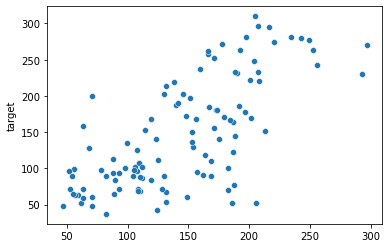

In [26]:
y_pred = model.predict(X_test_scaled)

sns.scatterplot(x = y_pred, y = y_test)

In [27]:
display(model.score(X_train_scaled, y_train))

0.519034189167905

In [28]:
cross_val_score(model, X_train_scaled, y_train)

array([0.52899012, 0.39018414, 0.49129656, 0.61104149, 0.2252414 ])